In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf
import tensorflow as tf

In [2]:
class StockAnalysis:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        self.df.dropna(inplace=True)
        self.closeValue = self.df.values[:, 3:4]

    def visualize_data(self):
        
        """
        주식 데이터를 시각화
        """
        numpyData = self.df.values

        fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(24, 20))
        
        self.df.Close.plot(ax=ax1)
        ax1.set(title = 'AAPL time series', ylabel = "Stock price")

        self.df.Volume.plot(ax=ax2)
        ax2.set(ylabel = "Volume")

        numpyDataShape = self.df.shape
        xval = np.arange(numpyDataShape[0])
        ax3.scatter(xval, self.closeValue)
        plt.show()

        
    def plot_basic_info(self):
        # 판다스 -> 넘파이
        numpyData = self.df.values

        # 넘파이 데이터 shape
        numpyDataShape = numpyData.shape

        # closeValue 정의
        closeValue = numpyData[:, 3:4]

        # 그래프 그리기
        fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(24, 20))
        
        self.df.Close.plot(ax=ax1)
        ax1.set(title='KS time series', ylabel="Stock price")
        
        self.df.Volume.plot(ax=ax2)
        ax2.set(ylabel="Volume")
        
        xval = np.arange(numpyDataShape[0])
        ax3.scatter(xval, closeValue)
        
        plt.show()

    def linear_regression_training(self):
        """
        선형 회귀 모델을 사용하여 주식의 종가를 예측
        """

        # 데이터 준비
        x_data = np.arange(10)
        x_data = (x_data + 1).tolist()
        y_data = self.closeValue.ravel()
        y_data = (y_data/50.).tolist()  # 데이터 스케일링

        # 첫 8개 데이터만 사용
        x_data = [1, 2, 3, 4, 5, 6, 7, 8]
        y_data = y_data[:8]

        # 학습률 및 변수 설정
        learning_rate = 0.001
        W = tf.Variable(2.9)
        b = tf.Variable(0.5)

        x_axis_loop = []
        y_axis_cost = []

        # 모델 학습
        for i in range(20000):
            with tf.GradientTape() as tape:
                hypothesis = W * x_data + b
                cost = tf.reduce_mean(tf.square(hypothesis - y_data))
            W_grad, b_grad = tape.gradient(cost, [W, b])
            W.assign_sub(learning_rate * W_grad)
            b.assign_sub(learning_rate * b_grad)    

            if i > 500:
                x_axis_loop.append(i)
                y_axis_cost.append(cost)

            if i % 1000 == 0:
                print("{:.5f} | {:10.4f} | cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

        # 비용 그래프 출력
        plt.plot(x_axis_loop, y_axis_cost, 'r-', label='비용')
        plt.legend()
        plt.xlabel('반복 횟수')
        plt.show()

        # 예측 결과 그래프 출력
        plt.plot(x_data, y_data, 'o')
        plt.plot(x_data, hypothesis, 'r--')
        plt.show()

In [3]:
def plot_sine_wave():
    x = np.linspace(0, 2 * np.pi, 400)
    y = np.sin(x ** 2)

    # 아래로 그래프 그리기
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    ax1.plot(x, y)
    ax2.plot(x, -y)

    # 가로로 그래프 그리기
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Horizontally stacked subplots')
    ax1.plot(x, y)
    ax2.plot(x, -y)

    plt.show()

In [4]:
def linear_regression_training(closeValue):
       
    # 데이터 전처리
    x_data = np.arange(10)
    x_data = (x_data + 1).tolist()
    y_data = closeValue.ravel()
    y_data = (y_data/50.).tolist()
    y_data = y_data[:8]

    # TensorFlow 버전 출력
    print("TensorFlow 버전: ", tf.__version__)

    # 학습 파라미터 초기화
    learning_rate = 0.001
    W = tf.Variable(2.9)
    b = tf.Variable(0.5)

    # 학습 과정에서 저장될 값들
    x_axis_loop = []
    y_axis_cost = []
    h_list = []

    # 학습 시작
    for i in range(20000):
        with tf.GradientTape() as tape:
            hypothesis = W * x_data + b
            h_list.append(hypothesis)
            cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)    

        # 학습 과정 시각화를 위한 값 저장
        if i > 500:
            x_axis_loop.append(i)
            y_axis_cost.append(cost)        

        # 일정 횟수마다 학습 상태 출력
        if i % 1000 == 0:
            print("{:.5f} | {:10.4f} | cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    # Cost 변화 시각화
    plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
    plt.legend()
    plt.xlabel('x')
    plt.show()

    # 결과 시각화
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, hypothesis, 'r--')
    plt.show()

In [5]:
stock_analysis = StockAnalysis("005935.KS", "2020-07-01", "2020-09-20")

[*********************100%%**********************]  1 of 1 completed


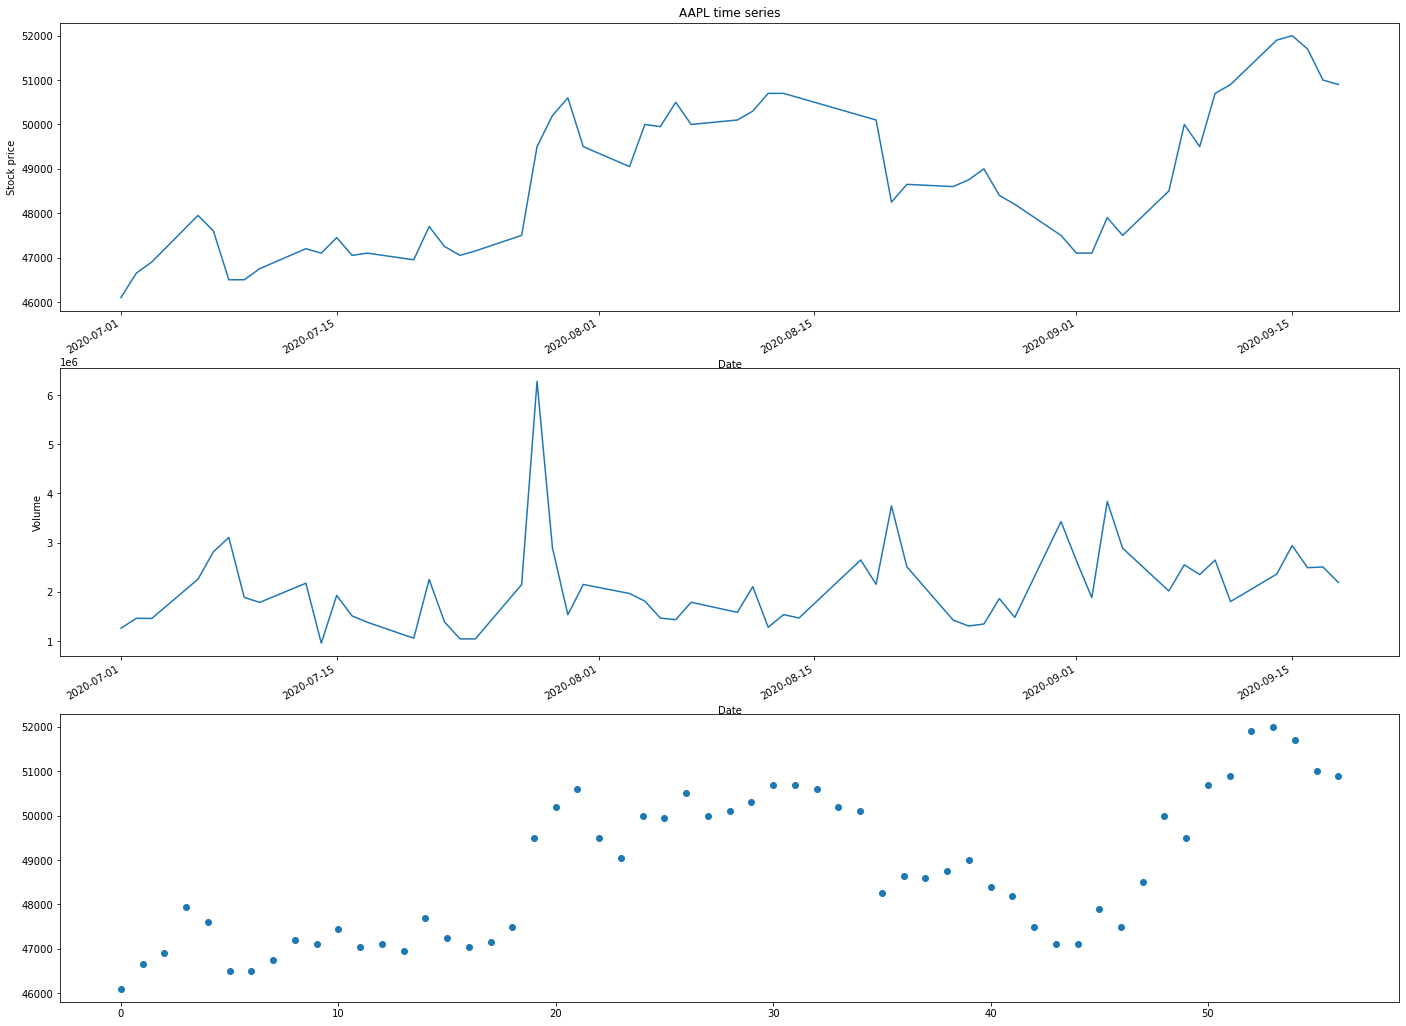

In [6]:
stock_analysis.visualize_data()

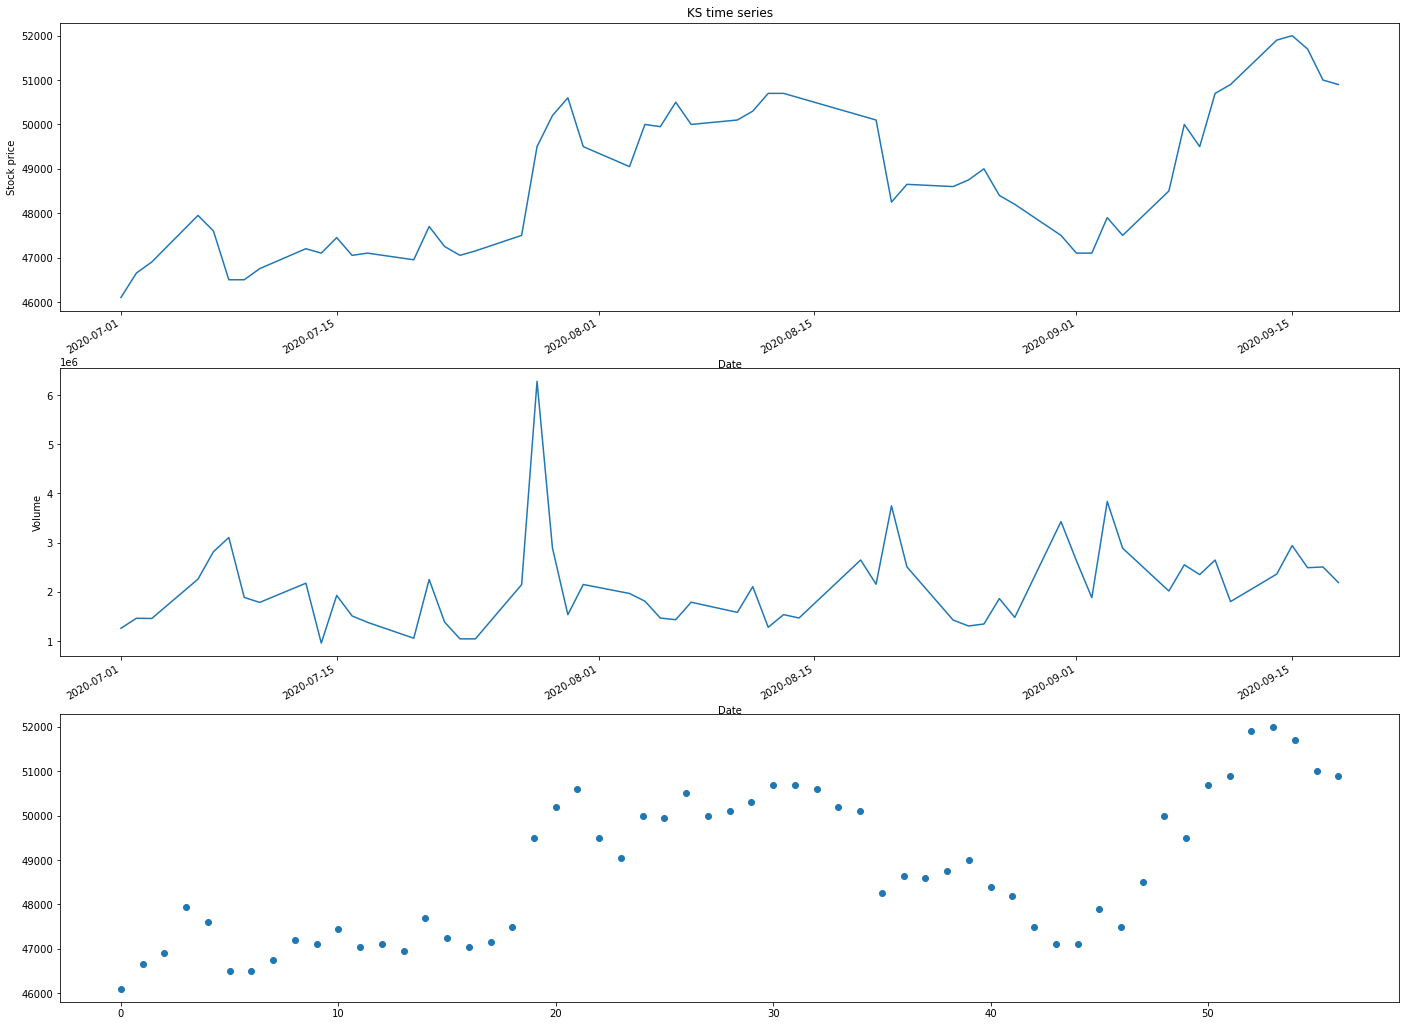

In [7]:
stock_analysis.plot_basic_info()

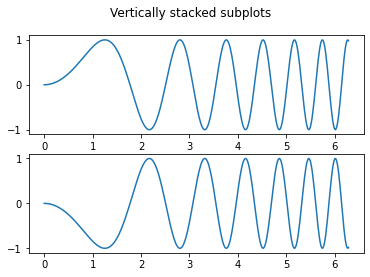

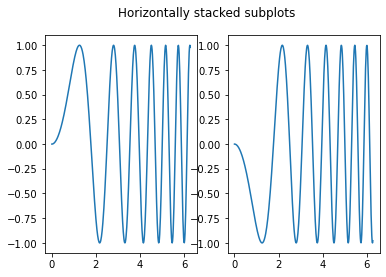

In [8]:
plot_sine_wave()

0.00000 |    11.1896 | cost =   2.347650
1000.00000 |   108.6104 | cost = 327.334930
2000.00000 |    73.0301 | cost = 527.378357
3000.00000 |    49.1636 | cost = 661.563232
4000.00000 |    33.1544 | cost = 751.571777
5000.00000 |    22.4157 | cost = 811.948181
6000.00000 |    15.2124 | cost = 852.447388
7000.00000 |    10.3805 | cost = 879.613708
8000.00000 |     7.1394 | cost = 897.836121
9000.00000 |     4.9654 | cost = 910.059448
10000.00000 |     3.5071 | cost = 918.258484
11000.00000 |     2.5289 | cost = 923.758118
12000.00000 |     1.8727 | cost = 927.447021
13000.00000 |     1.4327 | cost = 929.921265
14000.00000 |     1.1375 | cost = 931.580811
15000.00000 |     0.9396 | cost = 932.693787
16000.00000 |     0.8068 | cost = 933.439880
17000.00000 |     0.7177 | cost = 933.941284
18000.00000 |     0.6576 | cost = 934.278687
19000.00000 |     0.6185 | cost = 934.498962


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.ca

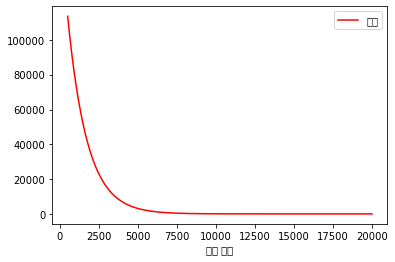

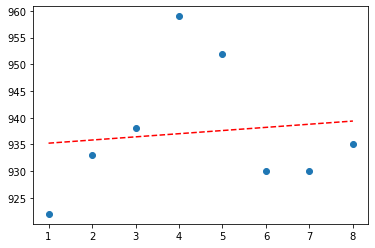

In [9]:
stock_analysis.linear_regression_training()